In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:\\Users\\rbesli\\Desktop\\borusan - data engineer eğitimleri - Caner Hoca\\Veri Görselleştirme\\used_cars_data.csv", 
                 usecols=["listed_date", "price"], parse_dates=["listed_date"])

df = df[(df["price"]>= 500) & (df["price"] <= 200_000)]  # fiyat aralığı belirledik 

C:\Users\rbesli\AppData\Local\Temp\ipykernel_19080\2137836704.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["price"], shade=True, color="steelblue", bw_adjust=0.5)
C:\Users\rbesli\AppData\Local\Temp\ipykernel_19080\2137836704.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() #grafiğin bozulmadan ekranda bastırılması


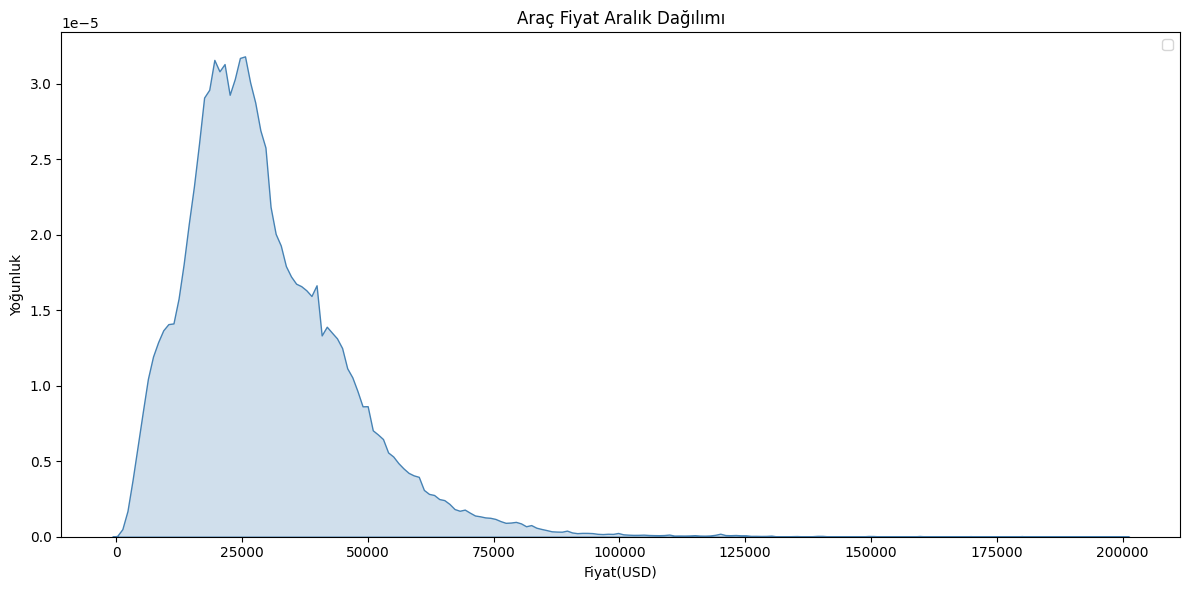

In [7]:
df = df[(df["price"] >= 500) &(df["price"] <= 200_000)]

plt.figure(figsize=(12,6))

sns.kdeplot(df["price"], shade=True, color="steelblue", bw_adjust=0.5)

plt.xlabel("Fiyat(USD)")
plt.ylabel("Yoğunluk")
plt.title("Araç Fiyat Aralık Dağılımı")
plt.legend() #grafiğin bozulmadan ekranda bastırılması
plt.tight_layout() #grafiğin bozulmadan ekranda bastırılması
plt.show()

In [15]:
df["day"] = df["listed_date"].dt.date 
# posting_date sütunundaki tarih bilgisinden sadece gün kısmını (tarih formatında) alıyoruz
# dt.date özelliği datetime nesnesinden sadece tarih kısmını (saat:dakika:saniye olmadan) alır     

In [16]:
     

daily = df.groupby("day")["price"].agg(["size", "median"]).rename(columns={"size":"count", "median":"med_price"})  
# Günlere göre fiyatları grupla
# Her gün için: kayıt sayısı ve medyan fiyat hesapla
# Sütun isimlerini daha anlaşılır yap: size -> count, median -> med_price


In [17]:
# 'count' sütunundaki günlük kayıt sayılarını al
# 7 günlük hareketli pencere oluştur
# Minimum 3 veri noktası olduğunda hesaplama yap
# 7 günlük hareketli ortalamayı hesapla

daily["count_7d"] = daily["count"].rolling(7, min_periods=3).mean()

daily["price_7d"] = daily["med_price"].rolling(7, min_periods=3).mean()



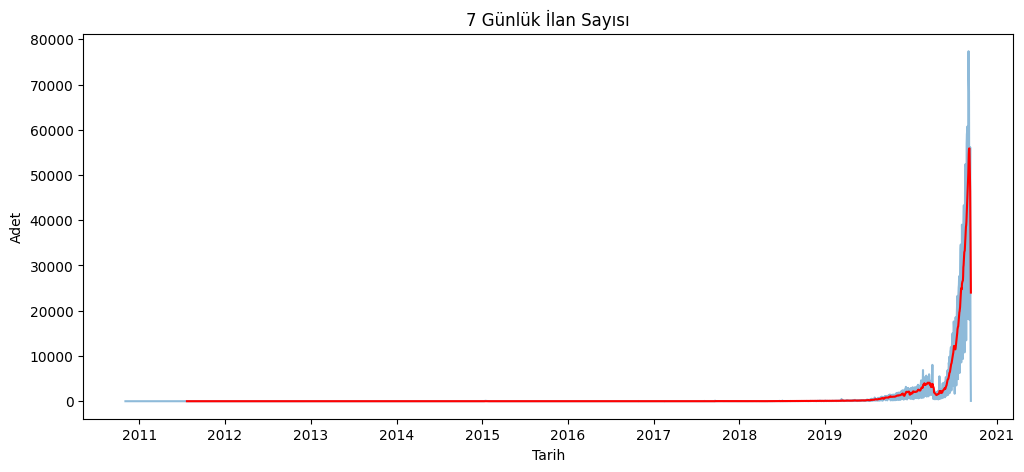

In [18]:
plt.figure(figsize=(12,5)) #grafiğimizin boyutu
plt.plot(daily.index, daily["count"], alpha=0.5, label="Günlük İlan Sayısı") 
#varsayılan olarak gri renkli noktalar verilecek bunda
plt.plot(daily.index, daily["count_7d"], label="7 Günlük Ortalama", color="red")
plt.xlabel("Tarih")
plt.ylabel("Adet")
plt.title("7 Günlük İlan Sayısı")
plt.show()

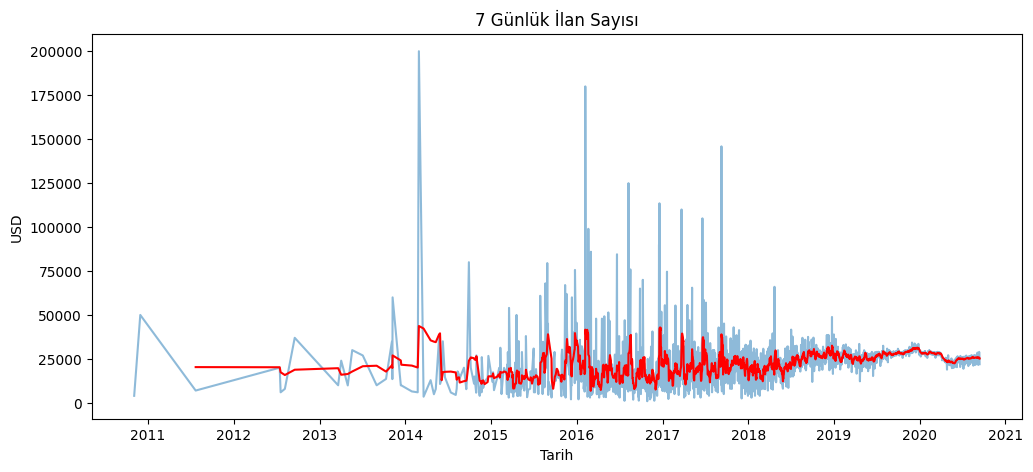

In [19]:
plt.figure(figsize=(12,5))
plt.plot(daily.index, daily["med_price"], alpha=0.5, label = "Günlük Medyan Fiyat")
plt.plot(daily.index, daily["price_7d"], label="7 Günlük Ortalama", color="red")
plt.xlabel("Tarih")
plt.ylabel("USD")
plt.title("7 Günlük İlan Sayısı")
plt.show()
